DFT IDFT of a speech signal using overlap add method

In [25]:
import torch
from torch.fft import fft, ifft
import torchaudio
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def overlap_add (signal, frame_size):
    frame_num = (len(signal) + frame_size -1) // frame_size
    output_signal = torch.zeros(len(signal) + frame_size)

    for i in range(frame_num):
        start = i * frame_size
        end = start + frame_size
        if end < (i+1) * frame_size:
            frame = signal[start:]
        else:
            frame = signal[start:end]
    
        # Zero-padding if the frame is smaller than frame_size
        if len(frame) < frame_size:
            frame = torch.nn.functional.pad(frame, (0, frame_size - len(frame)))

        spectrum = fft(frame)
        reconstructed_frame = ifft(spectrum).real

        output_signal[start:end] += reconstructed_frame

    return output_signal[:len(signal)]    

In [21]:
def plot_magnitude_spectrum(frame):
    spectrum = fft(frame)
    magnitude_spectrum = torch.abs(spectrum)
    plt.figure(figsize=(10,4))
    plt.plot(magnitude_spectrum)
    plt.title("Magnitude spectrum for the 100th frame")
    plt.xlabel("Frequency bin")
    plt.ylabel("Magnitude")
    # plt.colorbar(format='%+2.0f dB')
    plt.show()

In [22]:
def plot_difference(input_signal, output_signal):
    difference = input_signal - output_signal
    plt.figure(figsize=(10,4))
    plt.plot(difference)
    plt.title("Difference between input and output signals")
    plt.xlabel("Sample")
    plt.ylabel("Difference")
    plt.show()

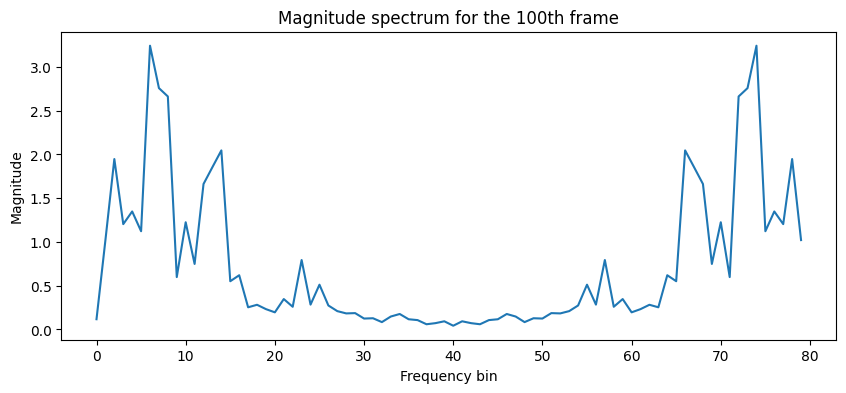

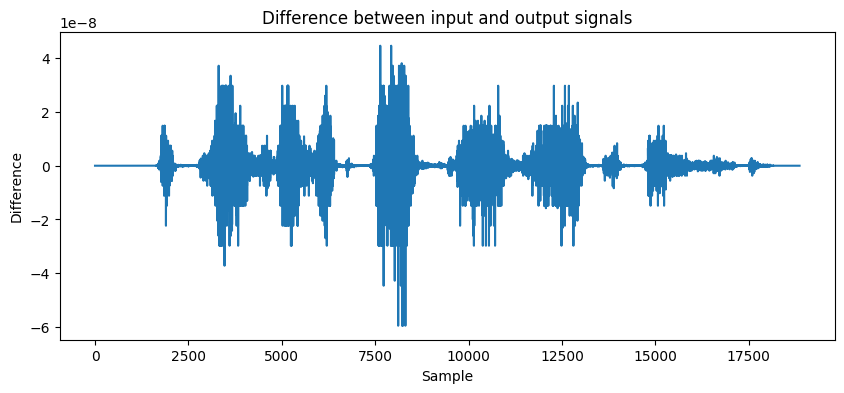

In [23]:
frame_size = 80
waveform, sr = torchaudio.load('input.wav')
waveform = waveform[0]

# overlap-add method
output_signal = overlap_add(waveform, frame_size)

# Plot of magnitude spectrum for the 100th frame
start = 100 * frame_size
end = start + frame_size
ff = waveform[start:end]
plot_magnitude_spectrum(ff)

# Plot of the difference between input and output (time domain) signals
plot_difference(waveform, output_signal)